In [1]:
import sys
sys.path.append("..") 
from utils.helpers import (
    read_from_json,
    watershed_lab,
    watershed_lab2,
    rgb_2_gray_unique,
    bbox_iou
)
import glob
import matplotlib.pyplot as plt
from imageio import imread
import numpy as np
from skimage import data, img_as_float
from skimage import exposure, filters


def sharpen(image):
    image = img_as_float(image)
    p5, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p5, p98))
    return img_rescale

In [2]:
imlist = glob.glob('/mnt/c/Users/trang.le/Desktop/shapemode/S-BIAD34/Files/HPA046767/*_w1.tif')

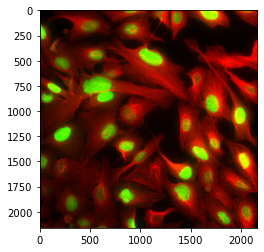

In [47]:
f = imlist[2]
w1 = imread(f)
w1 = sharpen(w1)
w2 = imread(f.replace('w1.tif','w2.tif'))
w2 = sharpen(w2)
w3 = imread(f.replace('w1.tif','w3.tif'))
w3 = sharpen(w3)
img = np.stack([w1,w2,np.zeros_like(w1)])
img = img.transpose(1,2,0)
plt.imshow(img)

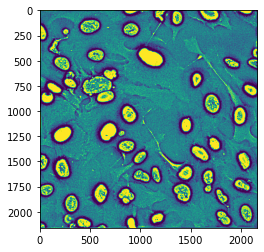

In [49]:
tmp = sharpen(w2+w3)
bi_adapt = filters.threshold_local(tmp, block_size=75, method='gaussian')
bin_mask = (tmp>bi_adapt).astype('uint8')
plt.imshow(bin_mask)

In [50]:
from imageio import imwrite
imwrite("eg.png", (img*256).astype('uint8'))
imwrite("fucci.png", (bin_mask*tmp*256).astype('uint8'))

In [48]:
imlist[2]

'/mnt/c/Users/trang.le/Desktop/shapemode/S-BIAD34/Files/HPA046767/5984_E12_s3_w1.tif'